# Выбор локации для скважины

Для добывающей компании нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль и проанализировать возможную прибыль и риски.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Описание данных:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
#Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats as st

In [2]:
geo_0 = pd. read_csv('/datasets/****ta_0.csv')
geo_1 = pd. read_csv('/datasets/****ta_1.csv')
geo_2 = pd. read_csv('/datasets/****ta_2.csv')

In [3]:
def data_info(data, data_name):
    data.info()
    print()
    print('{}'.format(data_name))
    data.hist(figsize=(10, 10), alpha=0.5)
    display(data.head(10))
    display(data.describe())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Распределение данных geo_0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


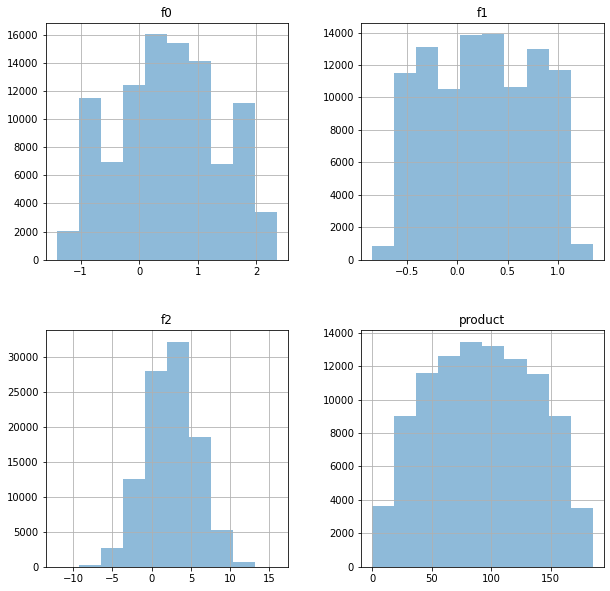

In [4]:
data_info(geo_0, 'Распределение данных geo_0')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Распределение данных geo_1


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


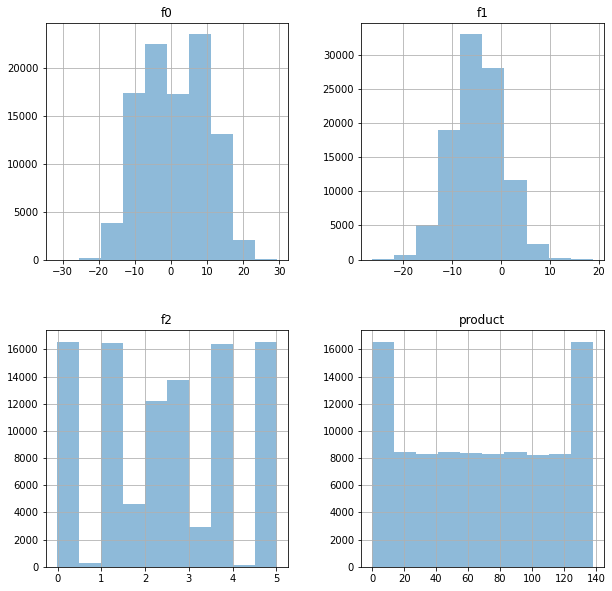

In [5]:
data_info(geo_1, 'Распределение данных geo_1')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Распределение данных geo_2


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


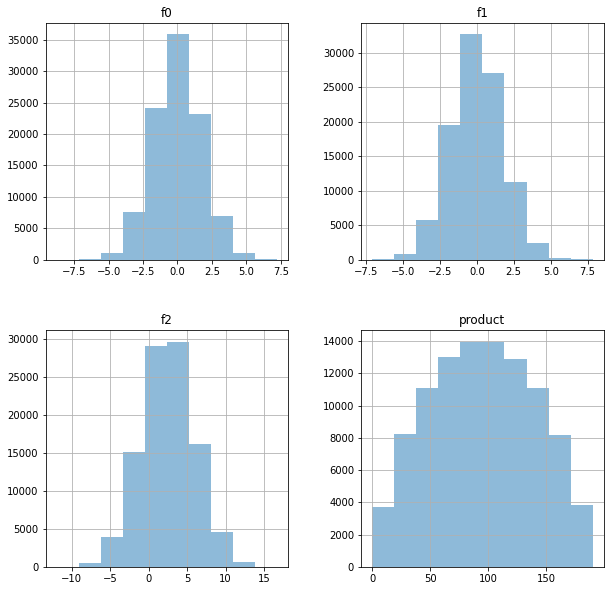

In [6]:
data_info(geo_2, 'Распределение данных geo_2')

In [7]:
#  Удалим лишние столбцы

def drop_column(data):
    data = data.drop('id', axis= 1)
    print('Таблица корреляции признаков')
    display(data.corr())
    return data

In [8]:
geo_0 = drop_column(geo_0)
display(geo_0.head(10))
geo_0.duplicated().sum()

Таблица корреляции признаков


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
5,0.969570,0.489775,-0.735383,64.741541
6,0.645075,0.530656,1.780266,49.055285
7,-0.400648,0.808337,-5.624670,72.943292
8,0.643105,-0.551583,2.372141,113.356160
9,2.173381,0.563698,9.441852,127.910945


0

In [9]:
geo_1 = drop_column(geo_1)
display(geo_1.head(10))
geo_1.duplicated().sum()

Таблица корреляции признаков


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
5,-3.327590,-2.205276,3.003647,84.038886
6,-11.142655,-10.133399,4.002382,110.992147
7,4.234715,-0.001354,2.004588,53.906522
8,13.355129,-0.332068,4.998647,134.766305
9,1.069227,-11.025667,4.997844,137.945408


0

In [10]:
geo_2 = drop_column(geo_2)
display(geo_2.head(10))
geo_2.duplicated().sum()

Таблица корреляции признаков


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
5,-0.758092,0.710691,2.585887,90.222465
6,-0.574891,0.317727,1.773745,45.641478
7,-1.906649,-2.458350,-0.177097,72.480640
8,1.776292,-0.279356,3.004156,106.616832
9,-1.214452,-0.439314,5.922514,52.954532


0

Подготовка денных началась с просмотра 3х датасетов. У всех трех датасетов отсутствуют пропуски и дубликаты. Данные распределены в основном нормально. Для дальнейшей работы столбws `id` из типа данных object приведены к типу данных 'int' кодировки признаков.

## Обучение и проверка модели

In [11]:
random = 999999

# Функция разбиения на выборки
def split(data):
    target=data['product']
    features=data.drop(['product'], axis=1)
    features_train,features_valid, target_train, target_valid = train_test_split(
        features,target, test_size = 0.25, random_state = random)
    print('Обучающая выборка:')
    print(features_train.shape)
    print(target_train.shape)
    print('Валидационная выборка:')
    print(features_valid.shape)
    print(target_valid.shape)
    return features_train,features_valid, target_train, target_valid

In [12]:
features_train_0,features_valid_0, target_train_0, target_valid_0 = split(geo_0)

Обучающая выборка:
(75000, 3)
(75000,)
Валидационная выборка:
(25000, 3)
(25000,)


In [13]:
features_train_1,features_valid_1, target_train_1, target_valid_1 = split(geo_1)

Обучающая выборка:
(75000, 3)
(75000,)
Валидационная выборка:
(25000, 3)
(25000,)


In [14]:
features_train_2,features_valid_2, target_train_2, target_valid_2 = split(geo_2)

Обучающая выборка:
(75000, 3)
(75000,)
Валидационная выборка:
(25000, 3)
(25000,)


In [15]:
def train_the_model(features_train,features_valid, target_train, target_valid, data_name):
    model = LinearRegression()
    model.fit(features_train,target_train)
    predict = model.predict(features_valid)
    rsme = mean_squared_error(target_valid, predict)**0.5
    print('Cредний запас предсказанного сырья {}:'.format(data_name), round(predict.mean(),2))  
    print('RMSE {}:'.format(data_name), round(rsme,2))
    return predict  

In [16]:
predict_0 = train_the_model(features_train_0,features_valid_0, target_train_0, target_valid_0, "geo_0")

Cредний запас предсказанного сырья geo_0: 92.53
RMSE geo_0: 37.6


In [17]:
predict_1 = train_the_model(features_train_1,features_valid_1, target_train_1, target_valid_1, "geo_1")

Cредний запас предсказанного сырья geo_1: 68.88
RMSE geo_1: 0.89


In [18]:
predict_2 = train_the_model(features_train_2,features_valid_2, target_train_2, target_valid_2, "geo_2")

Cредний запас предсказанного сырья geo_2: 94.95
RMSE geo_2: 40.06


Для всех трех регионов разделили данные на обучающую и валидационную выборку. Соотношение 75%/25%. Дело имеем с регрессией, поэтому в качестве модели используем Линейную регрессию. 
Посмотрев на средние запасы регионов, есть предположение, что регион 0 и регион 2 показывают лучшие результаты. Однако значения метрик у региона 0 и региона 2 хуже, чем у региона 1.


## Подготовка к расчёту прибыли

В нашем распоряжении данные 500 точек, из которых нужно выбрать 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. 

Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [19]:
# Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. 
ESTIMATION  = 10_000_000
BUDSTRAP_SAMPLES  = 1000
UNIT_YIELD  = 450
TOTAL  = 500
TOP_200  = 200
THRESHOLD = 0.025

quantity_materials = ESTIMATION / (UNIT_YIELD * TOP_200)
print('Достаточное количество сырья', quantity_materials)
print('Среднее количество сырья в 0 регионе', geo_0['product'].mean())
print('Среднее количество сырья в 0 регионе', geo_1['product'].mean())
print('Среднее количество сырья в 0 регионе', geo_2['product'].mean())

Достаточное количество сырья 111.11111111111111
Среднее количество сырья в 0 регионе 92.50000000000001
Среднее количество сырья в 0 регионе 68.82500000000002
Среднее количество сырья в 0 регионе 95.00000000000004


Показатель достаточности кол-ва сырья дает понять, что средние всех трех регионов  ниже требуемых значений. Это значит, что отбор скважен для последующих разработок нужно определять тщательнее.

## Расчёт прибыли и рисков 

In [20]:
def quantity_income(target, predict, TOP_200):
    target = target.reset_index(drop=True)
    predict = predict.reset_index(drop=True)
    predict_sorted = predict.sort_values(ascending=False)[:TOP_200]
    selected = target[predict_sorted.index]
    selected_total_income = selected.sum() * UNIT_YIELD
    return selected_total_income

In [21]:
def risks (target,predict, region, features):
    
    state = np.random.RandomState(random)
    
    values = []
    predict = pd.Series(predict, index=features.index)
    for i in range(1000):
        predict_subsample = predict.sample(TOTAL, replace=True, random_state=state)
        target_subsample = target[predict_subsample.index]
        values.append(quantity_income(target_subsample, predict_subsample, TOP_200) - ESTIMATION)
        
    values = pd.Series(values)
        
    mean = values.mean()/1000
    lower = values.quantile(.025)/1000
    upper = values.quantile(.975)/1000
    
    risk = (values < 0).mean()

    print()
    print(f'Для {region} региона:')
    print(f'Средняя прибыль скважен Топ-200 = {mean:.0f} млн. рублей.')
    print(f'Доверительный интервал лежит между {lower:.0f} - {upper:.0f} млн. рублей.')
    print(f'Риск убытков составляет = {risk:.2%}')

In [22]:
risks(target_valid_0, predict_0, 0,features_valid_0)


Для 0 региона:
Средняя прибыль скважен Топ-200 = 426 млн. рублей.
Доверительный интервал лежит между -116 - 950 млн. рублей.
Риск убытков составляет = 5.50%


In [23]:
risks(target_valid_1, predict_1, 1,features_valid_1)


Для 1 региона:
Средняя прибыль скважен Топ-200 = 467 млн. рублей.
Доверительный интервал лежит между 77 - 859 млн. рублей.
Риск убытков составляет = 1.10%


In [24]:
risks(target_valid_2, predict_2, 2,features_valid_2)


Для 2 региона:
Средняя прибыль скважен Топ-200 = 362 млн. рублей.
Доверительный интервал лежит между -161 - 881 млн. рублей.
Риск убытков составляет = 9.10%


## Риски и прибыль для каждого региона

С помощью техники Bootstrap из 500 скважин выбраны 200 лучших. Среди регионов оказался лучшим регион 1:
- Средняя прибыль скважен Топ-200 = 467 млн. рублей.
- Доверительный интервал лежит между 77 - 859 млн. рублей.
- Риск убытков составляет = 1.10%,  что меньше 2,5%, заявленных в ТЗ.